In [11]:
%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,sklearn,pandas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Tue Nov 27 2018 

CPython 3.6.6
IPython 6.5.0

numpy 1.15.3
scipy 1.1.0
sklearn 0.19.1
pandas 0.23.4

compiler   : GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
system     : Linux
release    : 4.15.0-39-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [12]:
# %matplotlib inline
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import nolds
import data
import mne

PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
DATA_ROOT = os.path.abspath(os.path.join(PROJ_ROOT, 'data'))
PROCESSED_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'processed'))
RAW_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'raw'))
LABELED_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'labeled'))
DURATIONS_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'durations'))
VISUAL_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'visual'))
import sys
sys.path.append(os.path.join(PROJ_ROOT, 'src'))
CHANNEL_NAMES = ['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2',
                 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
META_COLUMN_NAMES = ['freq', 'RESP_4W', 'RESP_FIN', 'REMISE_FIN', 'AGE', 'SEX', 'M_1',
       'M_4', 'M_F', 'délka léčby', 'lék 1', 'lék 2', 'lék 3', 'lék 4']
EXTRA = ['age', 'sex', 'sc_bef', 'sc_aft']
META_FILE_NAME = 'DEP-POOL_Final_144.xlsx'
meta_df = pd.read_excel(os.path.join(RAW_ROOT, META_FILE_NAME), index_col='ID', names=META_COLUMN_NAMES)

raw_fif = mne.io.read_raw_fif(os.path.join(PROCESSED_ROOT, '1a.fif'))
t = pd.DataFrame(raw_fif.get_data())
data = pd.DataFrame(np.transpose(t.values), columns=CHANNEL_NAMES)
data = np.transpose(data.values)

Opening raw data file /home/miroslav/Source/thesis_project/data/processed/1a.fif...
This filename (/home/miroslav/Source/thesis_project/data/processed/1a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19104 =      0.000 ...    76.416 secs
Ready.


<ipython-input-12-a857d1235d28>:29: RuntimeWarning: This filename (/home/miroslav/Source/thesis_project/data/processed/1a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(os.path.join(PROCESSED_ROOT, '1a.fif'))


In [202]:
meta_df['SEX'] = meta_df['SEX'].astype('category')
print("Women: %s " % len(meta_df['SEX'][meta_df['SEX']==0]))
print("Men: %s " % len(meta_df['SEX'][meta_df['SEX']==1]))
print("Age: \n%s" % meta_df['AGE'].describe())
print('250 Hz: %s \t 1000 Hz: %s' % (len(meta_df[meta_df['freq']==250]),len(meta_df[meta_df['freq']==1000])))

Women: 104 
Men: 29 
Age: 
count    133.000000
mean      47.706767
std        9.577263
min       30.000000
25%       39.000000
50%       49.000000
75%       55.000000
max       65.000000
Name: AGE, dtype: float64
250 Hz: 99 	 1000 Hz: 34


In [23]:
def prepare_dfs(col='lyap', kind='processed'):
    df = pd.read_pickle(os.path.join(LABELED_ROOT, kind, col, f'training_{col}.pkl')) 
    df_bef = pd.read_pickle(os.path.join(LABELED_ROOT, kind, col, f'{col}_bef.pkl'))
    df_aft = pd.read_pickle(os.path.join(LABELED_ROOT, kind, col, f'{col}_aft.pkl'))
    return df, df_bef, df_aft
    
def prepare_resp_non(col='lyap'):
    df, df_bef, df_aft = prepare_dfs(col)
    return df[df['change'] >= df.quantile(0.66)['change']], df[df['change'] <= df.quantile(0.33)['change']]

df, df_bef, df_aft = prepare_dfs('lyap')
df_resp, df_non = prepare_resp_non('lyap')
df_resp.loc[:, ['sc']], df_non.loc[:, ['sc']]
df_resp.loc[(slice(None), 'a'), :].mean(axis=1)
df.describe()

,FP1,FP2,F3,F4,C3,C4,P3,P4,O1,O2,...,T5,T6,Fz,Cz,Pz,age,sc,sc_bef,sc_aft,change
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.187907,0.187646,0.187596,0.188257,0.189066,0.189699,0.194062,0.193219,0.193873,0.193017,...,0.193329,0.193244,0.193285,0.194470,0.195240,48.063636,22.313636,27.654545,16.972727,2.211532
std,0.014422,0.014548,0.013563,0.014487,0.013728,0.014046,0.012306,0.013035,0.012679,0.014085,...,0.013349,0.012788,0.012490,0.012311,0.013010,9.798217,8.283603,4.276807,7.850730,1.883669
min,0.154400,0.155309,0.155171,0.145544,0.155337,0.149973,0.147425,0.131370,0.155533,0.125990,...,0.159192,0.155625,0.160833,0.158971,0.145366,30.000000,2.000000,17.000000,2.000000,0.702703
25%,0.177018,0.177120,0.177325,0.178966,0.179168,0.180954,0.186523,0.185497,0.187139,0.184075,...,0.185732,0.186172,0.184734,0.186242,0.188196,39.000000,17.000000,25.000000,11.000000,1.214286
50%,0.189924,0.189226,0.189588,0.189446,0.190498,0.191483,0.195579,0.194410,0.195505,0.194708,...,0.195455,0.194651,0.194805,0.196876,0.196972,49.000000,25.000000,27.000000,17.000000,1.641711
75%,0.198670,0.197533,0.197586,0.200289,0.200176,0.200059,0.203482,0.201797,0.202009,0.203041,...,0.202647,0.201875,0.202543,0.203326,0.203316,55.000000,28.000000,30.000000,23.000000,2.333333
max,0.220490,0.221246,0.219838,0.221580,0.218921,0.220810,0.220178,0.219802,0.220599,0.224667,...,0.220982,0.218046,0.216946,0.219707,0.221860,65.000000,41.000000,41.000000,37.000000,16.000000


In [14]:
print('Men / Women: {} / {}'.format(len(df[df['sex']==1]), len(df[df['sex']==0])))
age_desc = df['age'].describe()
print('Age summary: \n{}'.format(age_desc))
m1_desc = df['sc_bef'].describe()
print('Measurement 1: \n{}'.format(m1_desc))
m2_desc = df['sc_aft'].describe()
print('Measurement 2: \n{}'.format(m2_desc))

Men / Women: 52 / 168
Age summary: 
count    220.000000
mean      48.063636
std        9.798217
min       30.000000
25%       39.000000
50%       49.000000
75%       55.000000
max       65.000000
Name: age, dtype: float64
Measurement 1: 
count    220.000000
mean      27.654545
std        4.276807
min       17.000000
25%       25.000000
50%       27.000000
75%       30.000000
max       41.000000
Name: sc_bef, dtype: float64
Measurement 2: 
count    220.000000
mean      16.972727
std        7.850730
min        2.000000
25%       11.000000
50%       17.000000
75%       23.000000
max       37.000000
Name: sc_aft, dtype: float64


# Before and after comparison plots

<IPython.core.display.Javascript object>


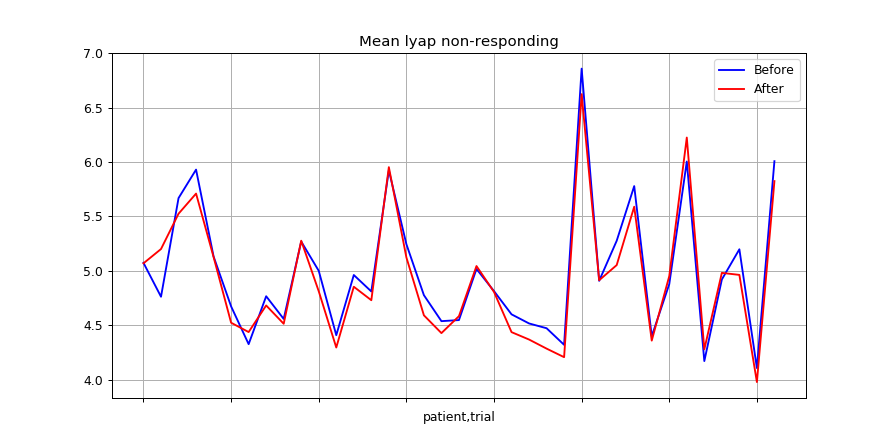

<IPython.core.display.Javascript object>


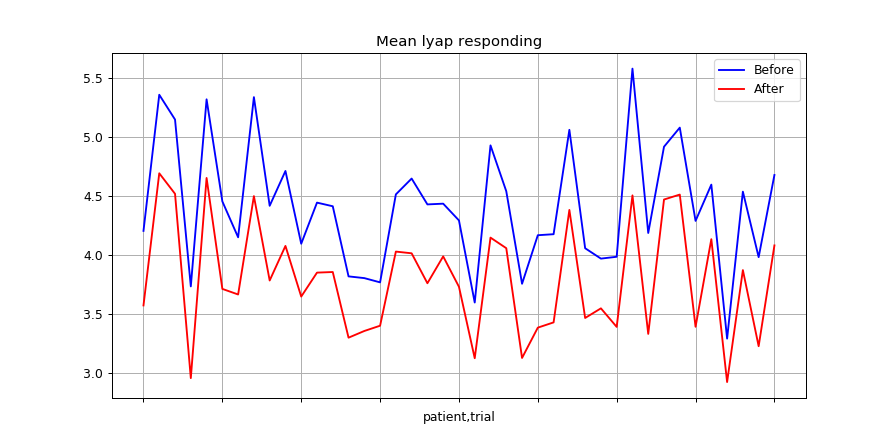

In [17]:
def plot_resp(df_bef, df_aft, m_name, resp, quantiles=False):
    if quantiles and resp:
        means_bef = df_resp.loc[(slice(None), 'a'), :].mean(axis=1)
        means_aft = df_resp.loc[(slice(None), 'b'), :].mean(axis=1)
    elif quantiles and not resp:
        means_bef = df_non.loc[(slice(None), 'a'), :].mean(axis=1)
        means_aft = df_non.loc[(slice(None), 'b'), :].mean(axis=1)
    else:
        means_bef = df_bef[df_bef['resp']==resp].mean(axis=1)
        means_aft = df_aft[df_aft['resp']==resp].mean(axis=1)
    plt.figure(figsize=(10,5))
    ax1 = means_bef.plot(color='blue', grid=True, label='Before')
    ax2 = means_aft.plot(color='red', grid=True, label='After')
    # ax1.set_ylim([8,13])
    # ax2.set_ylim([8,13])
    plt.legend()
    m = 'responding' if resp else 'non-responding'
    plt.title(f'Mean {m_name} {m}')
    plt.savefig(os.path.join(VISUAL_ROOT, f'{m_name}_{m}.png'))
    plt.show()
    
def plot_measure(df_bef, df_aft, m_name):
    plot_resp(df_bef, df_aft, m_name, 0, True)
    plot_resp(df_bef, df_aft, m_name, 1, True)

# for col in ['lyap', 'corr', 'sampen', 'dfa', 'hurst']:
for col in ['lyap']:
    df, df_bef, df_aft = prepare_dfs(col)
    df_resp, df_non = prepare_resp_non('lyap')
    plot_measure(df_resp.loc[(slice(None), 'a'), :], df_resp.loc[(slice(None), 'b'), :], col)
    # plot_measure(df_bef, df_aft, col)

<IPython.core.display.Javascript object>


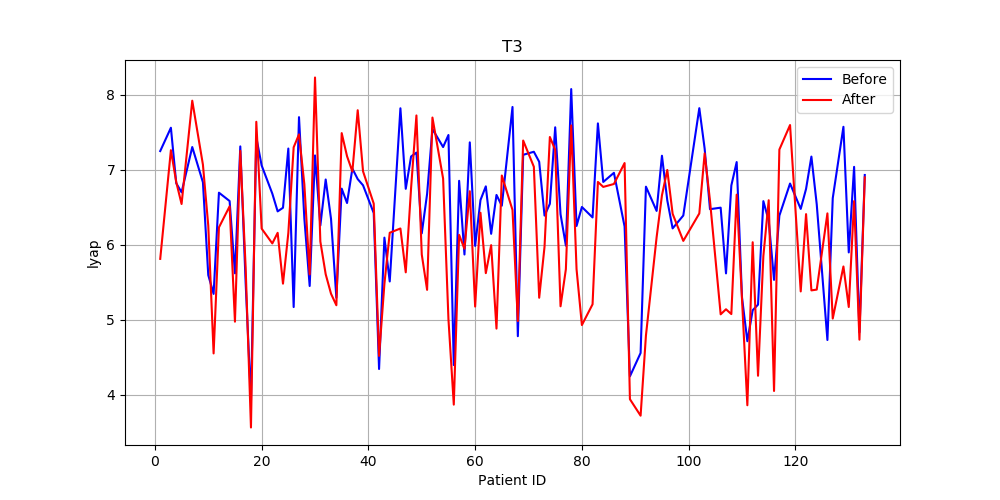

In [154]:
def plot_all(df_bef, df_aft, m_name, chan=None):
    if chan is not None:
        chan_bef = df_bef[chan]
        chan_aft = df_aft[chan]
    else:
        chan_bef = df_bef.mean(axis=1)
        chan_aft = df_aft.mean(axis=1)
        chan = 'Means'
    plt.figure(figsize=(10,5))
    ax1 = chan_bef.plot(color='blue', grid=True, label='Before')
    ax2 = chan_aft.plot(color='red', grid=True, label='After')
    plt.legend()
    plt.xlabel('Patient ID')
    plt.ylabel(f'{m_name}')
    plt.title(chan)
    # plt.savefig(os.path.join(VISUAL_ROOT, f'{m_name}.png'))
    plt.show()

col = 'lyap'
df, df_bef, df_aft = prepare_dfs(col)
# df_bef = df_bef[df_bef['label_r']==0]
# df_aft = df_aft[df_aft['label_r']==0]
plot_all(df_bef, df_aft, col, 'T3')

# Before and after K-S test

In [18]:
from scipy.stats import ks_2samp

def print_res(name, res, mean1='', mean2=''):
    if res.pvalue <= 0.02:
        m = '!!!'
    elif res.pvalue <= 0.05:
        m = '!!'
    elif res.pvalue < 0.08:
        m = '!'
    else:
        m = ''
    print('{}: \t {} \t {} \t {} \t {}'.format(name, res.pvalue, mean1, mean2, m))

def channel_wise_ks(df_bef, df_aft):
    print_res('Means', ks_2samp(df_bef[CHANNEL_NAMES].mean(axis=1), df_aft[CHANNEL_NAMES].mean(axis=1)), 
              df_bef[CHANNEL_NAMES].mean(axis=1).mean(), df_aft[CHANNEL_NAMES].mean(axis=1).mean())
    print_res('Stds', ks_2samp(df_bef[CHANNEL_NAMES].std(axis=1), df_aft[CHANNEL_NAMES].std(axis=1)), 
              df_bef[CHANNEL_NAMES].std(axis=1).mean(), df_aft[CHANNEL_NAMES].std(axis=1).mean())
    for col in CHANNEL_NAMES:
        print_res(col, ks_2samp(df_bef[col], df_aft[col]), df_bef[col].mean(), df_aft[col].mean())
        

# for col in ['lyap', 'corr', 'sampen', 'dfa', 'hurst']:
for col in ['lyap',]:
    df, df_bef, df_aft = prepare_dfs(col)
    print(col.upper())
    print('All')
    channel_wise_ks(df_bef, df_aft)
    print('\nNon-responding')
    channel_wise_ks(df_bef[df_bef['resp']==0], df_aft[df_aft['resp']==0])
    print('\nResponding')
    channel_wise_ks(df_bef[df_bef['resp']==1], df_aft[df_aft['resp']==1])
    print()

print('*** LOW / HIGH DEPRESSION SCORE ***')
# for col in ['lyap', 'corr', 'sampen', 'dfa', 'hurst']:
for col in ('lyap',):
    df, df_bef, df_aft = prepare_dfs(col)
    print(col.upper())
    low = df[df['sc'] <= df.quantile(0.33)['sc']]
    high = df[df['sc'] >= df.quantile(0.66)['sc']]
    channel_wise_ks(low, high)
    print()
    
print('*** RESPONDING / NON-RESPONDING - terciles ***')
# for col in ['lyap', 'corr', 'sampen', 'dfa', 'hurst']:
for col in ('lyap',):
    df_resp, df_non = prepare_resp_non(col)
    print(col.upper())
    channel_wise_ks(df_resp.loc[(slice(None), 'a'), :] , df_non.loc[(slice(None), 'a'), :])

LYAP
All
Means: 	 0.17902368629316182 	 0.1929058247237474 	 0.1889316055437189 	 
Stds: 	 0.005532314250355912 	 0.006647483687844737 	 0.007367249749423049 	 !!!
FP1: 	 0.17902368629316182 	 0.1897370373957653 	 0.186077677650662 	 
FP2: 	 0.3141209045295979 	 0.18923565462017986 	 0.18605596104876965 	 
F3: 	 0.06659506263053397 	 0.19011176083821404 	 0.1850797521742026 	 !
F4: 	 0.020893872337744673 	 0.19157758572564534 	 0.1849361406412694 	 !!
C3: 	 0.1312293712733436 	 0.19133122137836697 	 0.1868017357574061 	 
C4: 	 0.02089387233774473 	 0.19212334265846193 	 0.18727446438655027 	 !!
P3: 	 0.17902368629316182 	 0.1953582689045127 	 0.19276657953063497 	 
P4: 	 0.5060304054051364 	 0.19443847818190704 	 0.19199862358710765 	 
O1: 	 0.239527355728195 	 0.19528272082069897 	 0.19246407469506835 	 
O2: 	 0.005532314250355912 	 0.19528693496692603 	 0.19074751879691443 	 !!!
F7: 	 0.40331693180924477 	 0.19148077139848474 	 0.18834634427285996 	 
F8: 	 0.3141209045295976 	 0.1920

# PCA

<IPython.core.display.Javascript object>


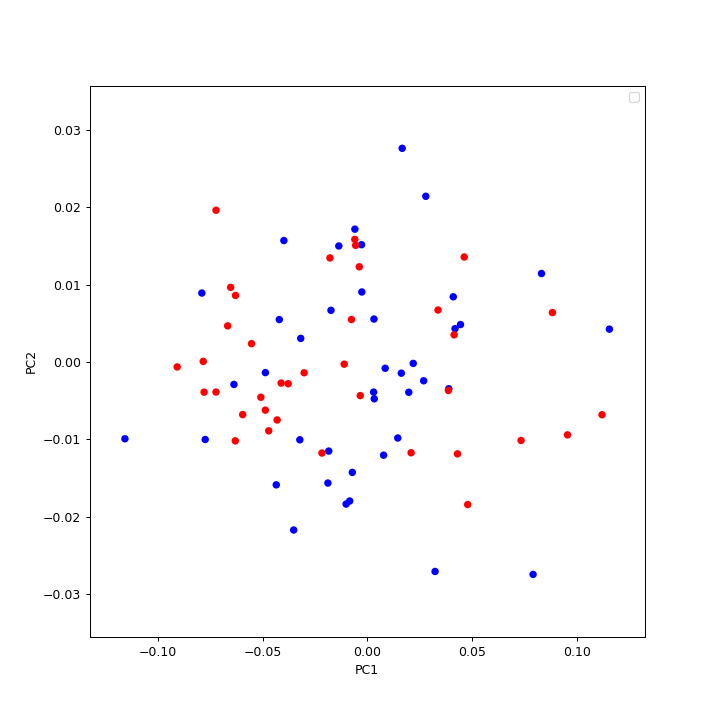

No handles with labels found to put in legend.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

def normalize(df):
    return (df - df.min()) / (df.max() - df.min())

def plot_pca_2d(df_first, df_second=None, c1='blue', c2='red', title=""):
    first = pca.transform(df_first[CHANNEL_NAMES])
    second = pca.transform(df_second[CHANNEL_NAMES]) if df_second is not None else None
    fig = plt.figure(figsize=(8,8))
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.scatter(first[:,0], first[:,1], c=c1, cmap='Blues', edgecolors='', label='')
    if second is not None:
        plt.scatter(second[:,0], second[:,1], c=c2, cmap='Reds', edgecolors='', label='')
    # plt.title(title)
    plt.legend()
    # plt.colorbar()
    plt.show()

df, df_bef, df_aft = prepare_dfs('lyap')
df_resp, df_non = prepare_resp_non('lyap')
pca = decomposition.PCA(n_components=2)
pca.fit(df[CHANNEL_NAMES])

# plot_pca_2d(df_bef, df_aft, title="Before / After")
# plot_pca_2d(df, None, c1=df['change'], title="Change in score")
# plot_pca_2d(df_bef, None, c1=df_bef['sc_bef'], title="")
# plot_pca_2d(df_aft, None, c1=df_aft['sc_aft'], title="")
# plot_pca_2d(df_aft[df_aft['sc_aft'] > 27], c1='red', title="")
# plot_pca_2d(df_bef[df_bef['sc_bef'] > 30], title="")
# plot_pca_2d(df[(df['sc']>30) & (df['sc']>30)], df[(df['sc'] < 20) & (df['sc'] < 20)], title="Depressed / Non-depressed")
# plot_pca_2d(df[df['sc'] <= 10], df[df['sc'] >= 30], title='Depressed / Not Depressed')
plot_pca_2d(df_resp.loc[(slice(None), 'a'), :], df_non.loc[(slice(None), 'a'), :], title='Resp / Non')

<IPython.core.display.Javascript object>


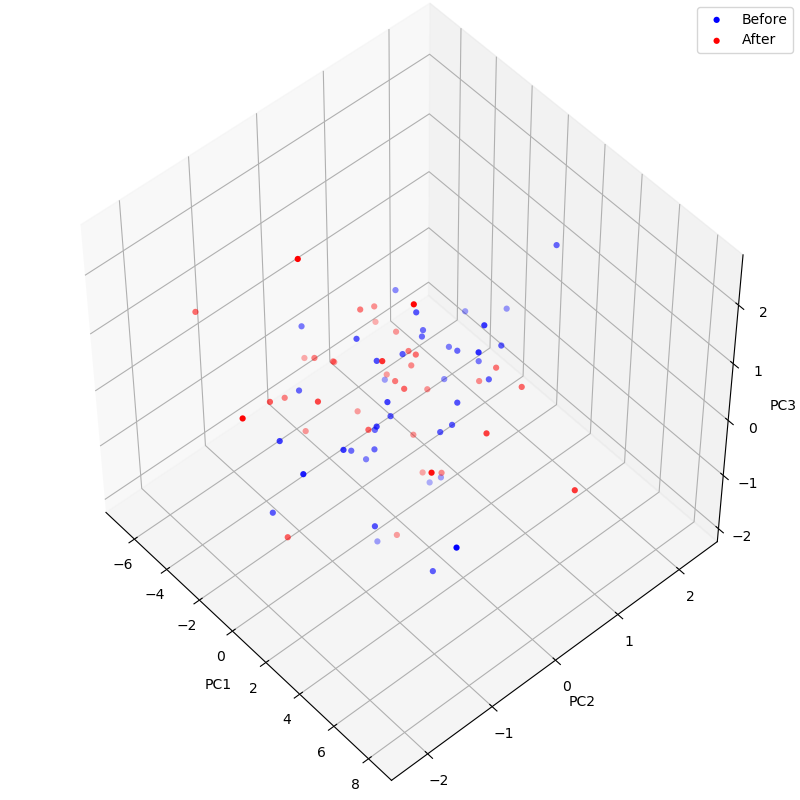

In [249]:
def plot_pca_3d(df_first, df_second=None, c1='blue', c2='red', title="", clus=False):
    pca = decomposition.PCA(n_components=3)
    pca.fit(df_first.append(df_second)[CHANNEL_NAMES])
    first = pca.transform(df_first[CHANNEL_NAMES])
    second = pca.transform(df_second[CHANNEL_NAMES]) if df_second is not None else None
    fig = plt.figure(figsize=(8,8))
    ax = Axes3D(fig)
    if clus:
        clus_bef = df_first.iloc[(-4 < first[:,0]) & (first[:,0] < -2) & (first[:,1] < 1) & (0 < first[:,1]) & (abs(first[:,2]) < 1), :][EXTRA]
        clus_aft = df_second.iloc[(-4 < second[:,0]) & (second[:,0] < -2) & (second[:,1] < 1) & (0 < second[:,1]) & (abs(second[:,2]) < 1), :][EXTRA]
        overlap = clus_bef.join(clus_aft, how='inner', lsuffix='', rsuffix='_a')
        print(clus_bef)
        print(clus_aft)
        print(overlap.loc[:, ['age', 'sex', 'sc_bef', 'sc_aft']])
        
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.scatter(first[:,0], first[:,1], first[:,2], c=c1, cmap='Blues', edgecolor='', label='Before')
    if second is not None:
        ax.scatter(second[:,0], second[:,1], second[:,2], c=c2, cmap='Reds', edgecolor='', label='After')
    # plt.title(title)
    plt.legend()
    plt.show()

col = 'lyap'
df, df_bef, df_aft = prepare_dfs(col)
df_resp, df_non = prepare_resp_non(col)

# plot_pca_3d(df_bef, df_aft, df_bef['age'], df_aft['age'])
# plot_pca_3d(df_bef, df_aft, title="Before / After")
# plot_pca_3d(df[df['sex']==0], df[df['sex']==1], title="Men / Women") # Men corr cluster
# plot_pca_3d(df_bef, df_aft, df_bef['sc_bef'], df_aft['sc_aft'], title="Scores bef / aft")
plot_pca_3d(df_resp.loc[(slice(None), 'a'), :], df_non.loc[(slice(None), 'a'), :], title='Resp / Non')

<IPython.core.display.Javascript object>


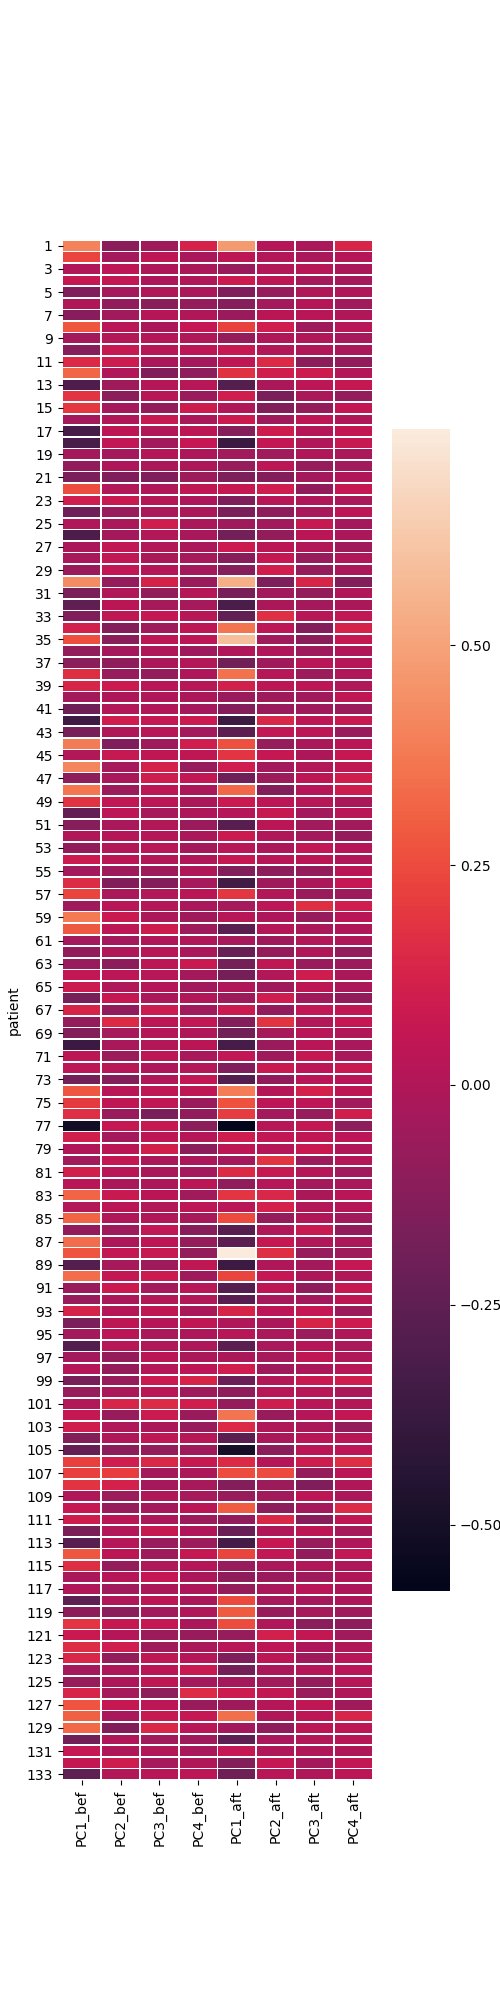

In [93]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

def plot_heatmap(df_bef=df_bef, df_aft=df_aft, n=3, title='All'):

    pca = decomposition.PCA(n_components=4)
    pca.fit(df[CHANNEL_NAMES])
    bef_proj_df = pd.DataFrame(pca.transform(df_bef[CHANNEL_NAMES]), index=df_bef.index, columns=['PC1', 'PC2', 'PC3', 'PC4'])
    aft_proj_df = pd.DataFrame(pca.transform(df_aft[CHANNEL_NAMES]), index=df_aft.index, columns=['PC1', 'PC2', 'PC3', 'PC4'])

    joined_df = bef_proj_df.join(aft_proj_df, lsuffix='_bef', rsuffix='_aft')

    plt.figure(figsize=(5, 20))
    ax = sns.heatmap(joined_df, linewidth=0.5)
    # plt.title(": ".join((measure, title)))
    plt.show()
    # plt.savefig(os.path.join(VISUAL_ROOT, "heatmaps", _".join((measure, title))+'.png'))

# for measure in ('lyap', 'corr', 'sampen'):
for measure in ('higu',):
    df, df_bef, df_aft = prepare_dfs(measure)
    plot_heatmap()
    # plot_heatmap(df_bef[df_bef['sex']==0], df_aft[df_aft['sex']==0], title='Women')
    # plot_heatmap(df_bef[df_bef['sex']==1], df_aft[df_aft['sex']==1], title='Men')
    # plot_heatmap(df_bef[df_bef['age']>50], df_aft[df_aft['age']>50], title='Age >= 50')
    # plot_heatmap(df_bef[df_bef['age']<=30], df_aft[df_aft['age']<=30], title='Age <= 30')
    # plot_heatmap(df_bef[df_bef['label_r']==1], df_aft[df_aft['label_r']==1], title='Responding')
    # plot_heatmap(df_bef[df_bef['label_r']==0], df_aft[df_aft['label_r']==0], title='Non-responding')
    # plot_heatmap(df_bef[df_bef['sc_bef']<25], df_aft[df_aft['sc_bef']<25], title='Score before < 25')
    # plot_heatmap(df_bef[df_bef['sc_bef']>=30], df_aft[df_aft['sc_bef']>=30], title='Score before >= 25')
    # plot_heatmap(df_aft[df_aft['sc_aft']<25], df_aft[df_aft['sc_aft']<25], title='Score after < 25')
    # plot_heatmap(df_aft[df_aft['sc_aft']>=30], df_aft[df_aft['sc_aft']>=30], title='Score after >= 25')
    

# Other ideas

<IPython.core.display.Javascript object>


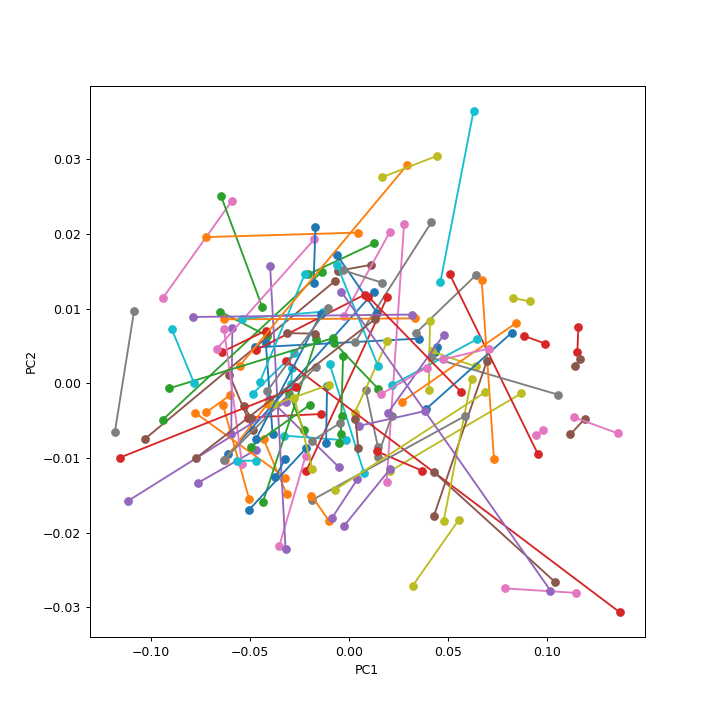

MEAN DISTANCE: 0.03495983093411277


<IPython.core.display.Javascript object>


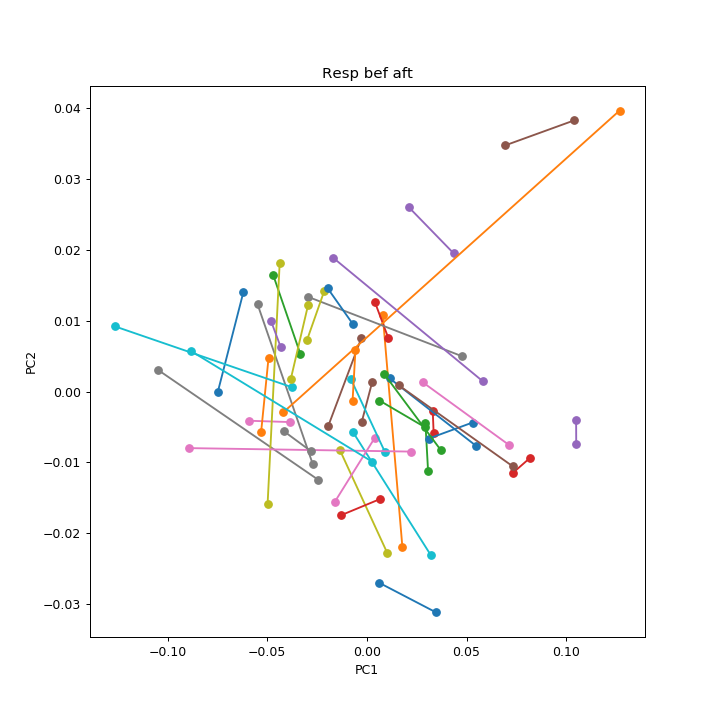

MEAN DISTANCE: 0.035185128668234276


<IPython.core.display.Javascript object>


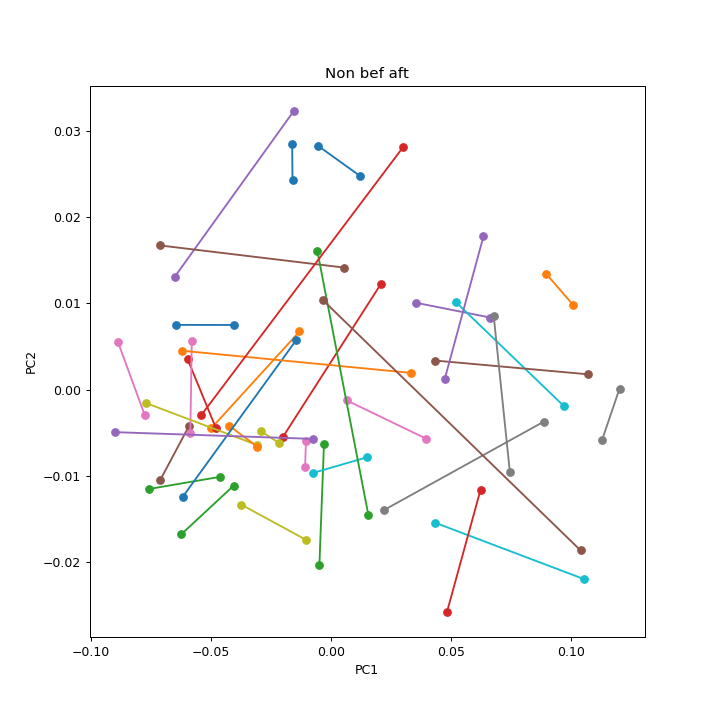

MEAN DISTANCE: 0.03656005687282448


In [20]:
# Plot PCA, but same people with the same color

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets
from math import sqrt

def plot_pca_pairs_2d(df_first, df_second, title=""):
    pca = decomposition.PCA(n_components=2)
    pca.fit(df_first.append(df_second)[CHANNEL_NAMES])
    first = pca.transform(df_first[CHANNEL_NAMES])
    second = pca.transform(df_second[CHANNEL_NAMES]) if df_second is not None else None
    fig = plt.figure(figsize=(8,8))
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    dists = []
    cmap = plt.get_cmap('gnuplot')
    for i in range(len(first)):
        xs = [first[i, 0], second[i, 0]]
        ys = [first[i, 1], second[i, 1]]
        dists.append(sqrt((first[i,0]-second[i,0])**2 + (first[i,1]-second[i,1])**2))
        # plt.plot(xs, ys, 'o-', color=cmap())
        plt.plot(xs, ys, 'o-')
    print("MEAN DISTANCE: {}".format(sum(dists)/len(dists)))
        
    plt.title(title)
    plt.show()

col = 'lyap'
df, df_bef, df_aft = prepare_dfs(col)
df_resp, df_non = prepare_resp_non(col)

plot_pca_pairs_2d(df_bef, df_aft, title="")
plot_pca_pairs_2d(df_resp.loc[(slice(None), 'a'), :], df_resp.loc[(slice(None), 'b'), :], title='Resp bef aft')
plot_pca_pairs_2d(df_non.loc[(slice(None), 'a'), :], df_non.loc[(slice(None), 'b'), :], title='Non bef aft')

In [21]:
# For each person, plot their distance between before / after
from math import sqrt

def filter_by_distance(df_first, df_second, n_components=3):
    pca = decomposition.PCA(n_components=n_components)
    pca.fit(df_first.append(df_second)[CHANNEL_NAMES])
    first = pca.transform(df_first[CHANNEL_NAMES])
    second = pca.transform(df_second[CHANNEL_NAMES]) if df_second is not None else None
    dists = []
    for fr, sr in zip(first, second):
        dists.append(sqrt(sum([(f-s)**2 for f, s in zip(fr, sr)])))
    perc = np.percentile(dists, 90)
    df = pd.DataFrame()
    for i, (fr, sr) in enumerate(zip(first, second)):
        dist = sqrt(sum([(f-s)**2 for f, s in zip(fr, sr)]))
        if dist > perc:
            df = df.append(df_first.iloc[i, :]) 
    print(df.loc[:, ['resp', 'age', 'sex', 'sc_bef', 'sc_aft', 'change']])
    

col = 'lyap'
df, df_bef, df_aft = prepare_dfs(col)
df_resp, df_non = prepare_resp_non(col)

filter_by_distance(df_bef, df_aft)
filter_by_distance(df_resp.loc[(slice(None), 'a'), :], df_resp.loc[(slice(None), 'b'), :])
filter_by_distance(df_non.loc[(slice(None), 'a'), :], df_non.loc[(slice(None), 'b'), :])

     resp   age  sex  sc_bef  sc_aft    change
1     1.0  49.0  0.0    26.0    13.0  2.000000
20    1.0  49.0  0.0    27.0    13.0  2.076923
28    1.0  57.0  1.0    34.0    10.0  3.400000
62    1.0  34.0  0.0    23.0    10.0  2.300000
72    0.0  55.0  0.0    23.0    18.0  1.277778
102   1.0  56.0  1.0    18.0     6.0  3.000000
114   1.0  55.0  0.0    25.0    12.0  2.083333
123   0.0  54.0  1.0    24.0    25.0  0.960000
124   0.0  52.0  0.0    30.0    23.0  1.304348
127   0.0  35.0  0.0    25.0    21.0  1.190476
129   1.0  38.0  0.0    27.0     6.0  4.500000
          resp   age  sex  sc_bef  sc_aft    change
(62, a)    1.0  34.0  0.0    23.0    10.0  2.300000
(102, a)   1.0  56.0  1.0    18.0     6.0  3.000000
(114, a)   1.0  55.0  0.0    25.0    12.0  2.083333
(129, a)   1.0  38.0  0.0    27.0     6.0  4.500000
          resp   age  sex  sc_bef  sc_aft    change
(72, a)    0.0  55.0  0.0    23.0    18.0  1.277778
(123, a)   0.0  54.0  1.0    24.0    25.0  0.960000
(124, a)   0.0  52.0